In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

data_frames = []


files = ['free10VSfixed5.csv', 'free10VSfixed10.csv', 'fixed5VSfixed10.csv']

for f in files:
    # Read the csv file
    df = pd.read_csv(f)

    col_names = df.columns
    model1_name = col_names[0]  # e.g., 'free10iter'
    model2_name = col_names[4]  # e.g., 'fixed5iter'

    # Create a renaming map
    rename_map = {
        model1_name: 'question_id_1',
        f'{model1_name}_question': 'question_1',
        f'{model1_name}_student_level': 'student_level_1',
        f'{model1_name}_materials': 'materials_1',
        model2_name: 'question_id_2',
        f'{model2_name}_question': 'question_2',
        f'{model2_name}_student_level': 'student_level_2',
        f'{model2_name}_materials': 'materials_2'
    }

    # Rename columns
    df = df.rename(columns=rename_map)

    # Replace free10iter with dynamic, fixed5iter with fixed_5, fixed10iter with fixed_10
    def rename(model_name):
        if model_name == 'free10iter':
            return 'D'  # Dynamic
        elif model_name == 'fixed5iter':
            return 'F5'  # Fixed 5
        elif model_name == 'fixed10iter':
            return 'F10'  # Fixed 10

    # Add columns specifying which models are being compared
    df['model_1'] = rename(model1_name)
    df['model_2'] = rename(model2_name)

    data_frames.append(df)

# Process combination files (intra-model comparisons)
comb_files = ['free10comb.csv', 'fixed5comb.csv', 'fixed10comb.csv']

for f in comb_files:
    df = pd.read_csv(f)

    # Rename map for comb files
    rename_map = {
        'first': 'question_1',
        'first_attempt': 'question_id_1',
        'first_student_level': 'student_level_1',
        'first_materials': 'materials_1',
        'second': 'question_2',
        'second_attempt': 'question_id_2',
        'second_student_level': 'student_level_2',
        'second_materials': 'materials_2'
    }
    df = df.rename(columns=rename_map)

    # Determine model name from filename
    def rename_comb(f):
        if 'free10' in f:
            return 'D'  # Dynamic
        elif 'fixed5' in f:
            return 'F5'  # Fixed 5
        elif 'fixed10' in f:
            return 'F10'  # Fixed 10

    df['model_1'] = rename_comb(f)
    df['model_2'] = rename_comb(f)

    data_frames.append(df)

# Concatenate all dataframes
data_concat = pd.concat(data_frames, ignore_index=True)


def get_config_id(model, level, materials):
    l_str = 'L' if level else 'W'
    m_str = 'M' if materials else 'W'
    return f"{model}{l_str}{m_str}"


data_concat['config_1'] = data_concat.apply(lambda x: get_config_id(
    x['model_1'], x['student_level_1'], x['materials_1']), axis=1)
data_concat['config_2'] = data_concat.apply(lambda x: get_config_id(
    x['model_2'], x['student_level_2'], x['materials_2']), axis=1)

data_concat

,question_id_1,question_1,student_level_1,materials_1,question_id_2,question_2,student_level_2,materials_2,criteria,difference,explanation,prompt_tokens,completion_tokens,total_tokens,model_1,model_2,config_1,config_2
0,0,The Student's response:\n\nReflective Question...,True,True,0,The Student's response:\n\nReflective Question...,True,True,clarity,2,Question 2’s LEGO analogy grounds the concept ...,561,323,884,D,F5,DLM,F5LM
1,0,The Student's response:\n\nReflective Question...,True,True,0,The Student's response:\n\nReflective Question...,True,True,relevance,1,Question 2 uses a concrete analogy to illustra...,559,643,1202,D,F5,DLM,F5LM
2,0,The Student's response:\n\nReflective Question...,True,True,0,The Student's response:\n\nReflective Question...,True,True,depth,2,The second question employs a concrete analogy...,564,385,949,D,F5,DLM,F5LM
3,0,The Student's response:\n\nReflective Question...,True,True,0,The Student's response:\n\nReflective Question...,True,True,overall_quality,2,"Question 2 uses a concrete, relatable analogy ...",567,319,886,D,F5,DLM,F5LM
4,0,The Student's response:\n\nReflective Question...,True,True,1,The Student's response:\n\nReflective Question...,True,True,clarity,-2,Question 1 is concise and focused on a single ...,506,451,957,D,F5,DLM,F5LM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,24,The Student's response: \nWhen planning futur...,False,True,33,The Student's response: \nIn what ways can th...,False,False,overall_quality,2,Question 2 directly engages key internet conce...,767,319,1086,F10,F10,F10WM,F10WW
6596,24,The Student's response: \nWhen planning futur...,False,True,34,The Student's response: \nWhat diverse real-w...,False,False,clarity,2,The first response is a set of planning statem...,715,526,1241,F10,F10,F10WM,F10WW
6597,24,The Student's response: \nWhen planning futur...,False,True,34,The Student's response: \nWhat diverse real-w...,False,False,relevance,2,The first question is unrelated to the basics ...,713,252,965,F10,F10,F10WM,F10WW
6598,24,The Student's response: \nWhen planning futur...,False,True,34,The Student's response: \nWhat diverse real-w...,False,False,depth,2,Question 2 prompts students to investigate var...,718,398,1116,F10,F10,F10WM,F10WW


In [2]:
data_swapped = data_concat.copy()

# Create symmetric dataset by swapping 1 and 2
pairs = [
    ('config_1', 'config_2'),
    ('model_1', 'model_2'),
    ('question_id_1', 'question_id_2'),
    ('question_1', 'question_2'),
    ('student_level_1', 'student_level_2'),
    ('materials_1', 'materials_2')
]

for c1, c2 in pairs:
    if c1 in data_concat.columns and c2 in data_concat.columns:
        data_swapped[c1] = data_concat[c2]
        data_swapped[c2] = data_concat[c1]

if 'difference' in data_swapped.columns:
    data_swapped['difference'] = -data_swapped['difference']

data = pd.concat([data_concat, data_swapped], ignore_index=True)
order = data['config_1'].unique()

print(order)

['DLM' 'DLW' 'DWM' 'DWW' 'F5LM' 'F5LW' 'F5WM' 'F5WW' 'F10LM' 'F10LW'
 'F10WM' 'F10WW']


In [24]:
def plot_heatmap(data, criteria):
    data = data[data['criteria'] == criteria]
    all_configs = data['config_1'].unique()

    # Initialize the matrix
    matrix_size = len(all_configs)
    score_matrix = np.zeros((matrix_size, matrix_size))
    score_matrix[:] = np.nan

    def calculate_score(df, target_config, other_config):
        subset = df[(df['config_1'] == target_config) &
                    (df['config_2'] == other_config)]

        total_evals = len(subset)

        if total_evals == 0:
            return np.nan

        # Target is model_1. Target wins if difference < 0.
        # We want sum of how much target is better.
        wins = subset[subset['difference'] < 0]
        score_sum = wins['difference'].abs().sum()
        weighted_total = (subset['difference'].abs()).sum()

        return score_sum / weighted_total

    # Fill the matrix
    for i in range(matrix_size):
        for j in range(i + 1, matrix_size):
            row_config = all_configs[i]
            col_config = all_configs[j]

            # "The cell will contain a number of how better the row is better than the column."
            score = calculate_score(data, row_config, col_config)
            score_matrix[i, j] = round(score, 2)
            score_matrix[j, i] = round(1 - round(score, 2), 2)

    heatmap_df = pd.DataFrame(
        score_matrix, index=all_configs, columns=all_configs)

    for row in heatmap_df.index:
        print('{', end='')
        for col in heatmap_df.columns:
            if pd.isna(heatmap_df.loc[row, col]):
                print("-1", end='')
            else:
                print('%.2f' % heatmap_df.loc[row, col], end='')
            if col != heatmap_df.columns[-1]:
                print(',', end=' ')

        print('},')

    # Display the heatmap
    plt.figure(figsize=(11, 10))
    sns.heatmap(heatmap_df, annot=True, fmt=".2f",
                cmap="YlGnBu", cbar_kws={'label': 'Score'})
    plt.title("Model Comparison Matrix - " + criteria)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Save the heatmap as an image file
    plt.savefig(f'Images/model_comparison_matrix_{criteria}.png')

    plt.show()

{-1, 0.80, 0.66, 0.80, 0.89, 1.00, 1.00, 1.00, 0.89, 1.00, 1.00, 1.00},
{0.20, -1, 0.41, 0.50, 0.65, 0.97, 1.00, 0.97, 0.80, 1.00, 1.00, 1.00},
{0.34, 0.59, -1, 0.75, 0.80, 0.94, 1.00, 1.00, 0.85, 1.00, 1.00, 1.00},
{0.20, 0.50, 0.25, -1, 0.75, 0.88, 0.95, 0.87, 0.86, 1.00, 0.98, 1.00},
{0.11, 0.35, 0.20, 0.25, -1, 0.47, 0.71, 0.51, 0.68, 0.98, 0.78, 0.95},
{0.00, 0.03, 0.06, 0.12, 0.53, -1, 0.85, 0.50, 0.74, 0.95, 0.86, 1.00},
{0.00, 0.00, 0.00, 0.05, 0.29, 0.15, -1, 0.20, 0.55, 0.56, 0.75, 0.60},
{0.00, 0.03, 0.00, 0.13, 0.49, 0.50, 0.80, -1, 0.76, 0.86, 0.80, 0.92},
{0.11, 0.20, 0.15, 0.14, 0.32, 0.26, 0.45, 0.24, -1, 0.44, 0.60, 0.38},
{0.00, 0.00, 0.00, 0.00, 0.02, 0.05, 0.44, 0.14, 0.56, -1, 0.54, 0.31},
{0.00, 0.00, 0.00, 0.02, 0.22, 0.14, 0.25, 0.20, 0.40, 0.46, -1, 0.32},
{0.00, 0.00, 0.00, 0.00, 0.05, 0.00, 0.40, 0.08, 0.62, 0.69, 0.68, -1},


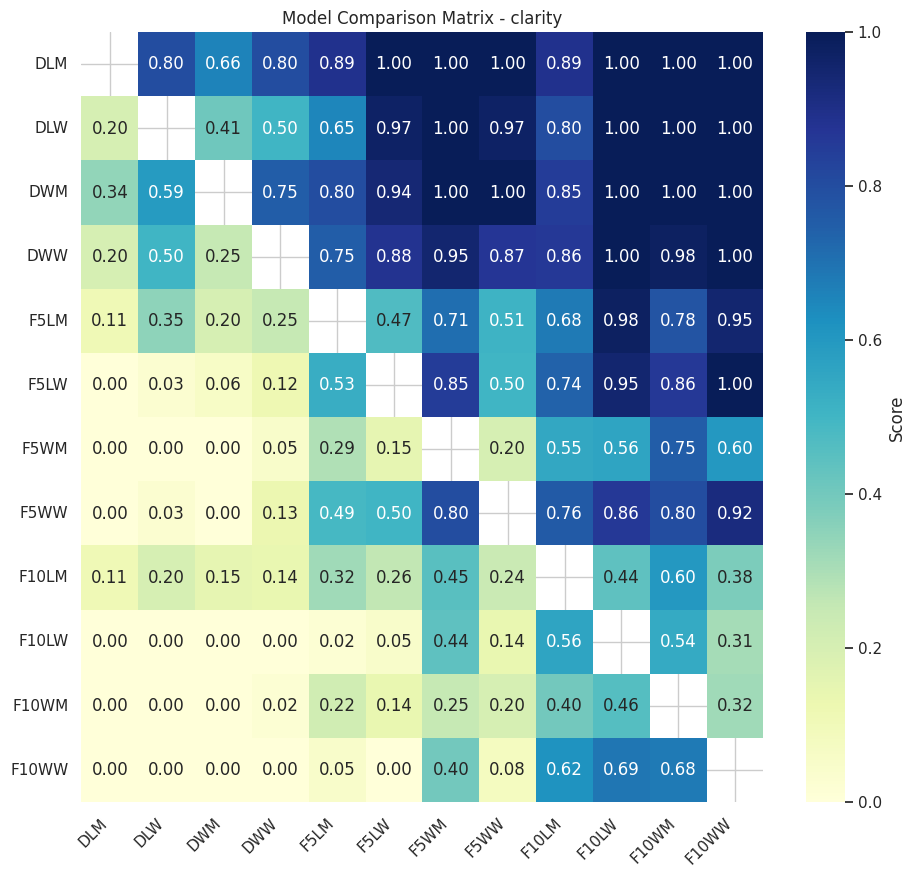

{-1, 0.03, 0.23, 0.11, 0.45, 0.43, 1.00, 0.39, 0.91, 0.82, 1.00, 0.75},
{0.97, -1, 0.86, 0.77, 0.79, 0.97, 1.00, 0.72, 1.00, 1.00, 1.00, 1.00},
{0.77, 0.14, -1, 0.54, 0.69, 0.67, 1.00, 0.58, 0.98, 0.98, 0.98, 0.92},
{0.89, 0.23, 0.46, -1, 0.72, 0.71, 1.00, 0.69, 1.00, 1.00, 1.00, 0.95},
{0.55, 0.21, 0.31, 0.28, -1, 0.32, 0.91, 0.31, 0.89, 0.51, 0.94, 0.50},
{0.57, 0.03, 0.33, 0.29, 0.68, -1, 1.00, 0.57, 0.92, 0.76, 1.00, 0.82},
{0.00, 0.00, 0.00, 0.00, 0.09, 0.00, -1, 0.04, 0.69, 0.12, 0.87, 0.04},
{0.61, 0.28, 0.42, 0.31, 0.69, 0.43, 0.96, -1, 0.94, 0.59, 1.00, 0.66},
{0.09, 0.00, 0.02, 0.00, 0.11, 0.08, 0.31, 0.06, -1, 0.11, 0.55, 0.10},
{0.18, 0.00, 0.02, 0.00, 0.49, 0.24, 0.88, 0.41, 0.89, -1, 0.96, 0.41},
{0.00, 0.00, 0.02, 0.00, 0.06, 0.00, 0.13, 0.00, 0.45, 0.04, -1, 0.04},
{0.25, 0.00, 0.08, 0.05, 0.50, 0.18, 0.96, 0.34, 0.90, 0.59, 0.96, -1},


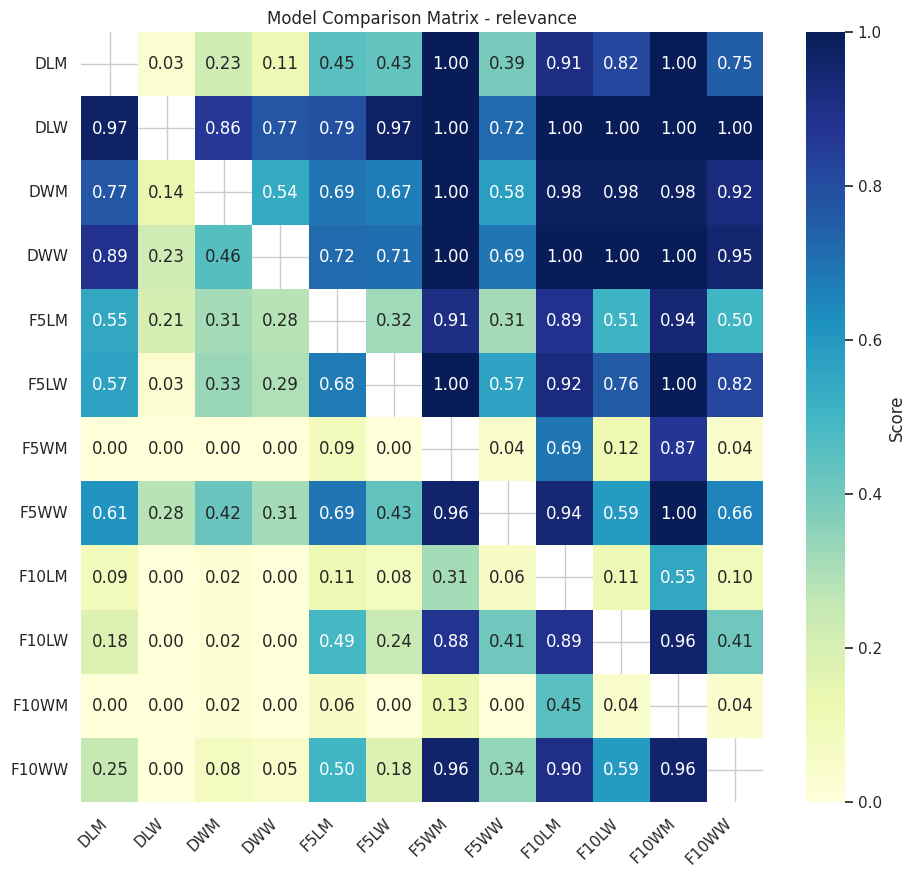

{-1, 0.00, 0.32, 0.00, 0.13, 0.00, 0.73, 0.00, 0.73, 0.08, 0.85, 0.04},
{1.00, -1, 0.95, 0.62, 0.65, 0.34, 1.00, 0.14, 0.96, 0.23, 1.00, 0.14},
{0.68, 0.05, -1, 0.09, 0.28, 0.07, 0.89, 0.05, 0.83, 0.21, 0.88, 0.04},
{1.00, 0.38, 0.91, -1, 0.64, 0.25, 1.00, 0.00, 0.96, 0.18, 1.00, 0.08},
{0.87, 0.35, 0.72, 0.36, -1, 0.34, 0.98, 0.12, 0.89, 0.10, 0.96, 0.09},
{1.00, 0.66, 0.93, 0.75, 0.66, -1, 0.98, 0.13, 0.98, 0.20, 1.00, 0.11},
{0.27, 0.00, 0.11, 0.00, 0.02, 0.02, -1, 0.00, 0.63, 0.00, 0.78, 0.02},
{1.00, 0.86, 0.95, 1.00, 0.88, 0.87, 1.00, -1, 0.94, 0.22, 1.00, 0.36},
{0.27, 0.04, 0.17, 0.04, 0.11, 0.02, 0.37, 0.06, -1, 0.04, 0.47, 0.00},
{0.92, 0.77, 0.79, 0.82, 0.90, 0.80, 1.00, 0.78, 0.96, -1, 1.00, 0.58},
{0.15, 0.00, 0.12, 0.00, 0.04, 0.00, 0.22, 0.00, 0.53, 0.00, -1, 0.00},
{0.96, 0.86, 0.96, 0.92, 0.91, 0.89, 0.98, 0.64, 1.00, 0.42, 1.00, -1},


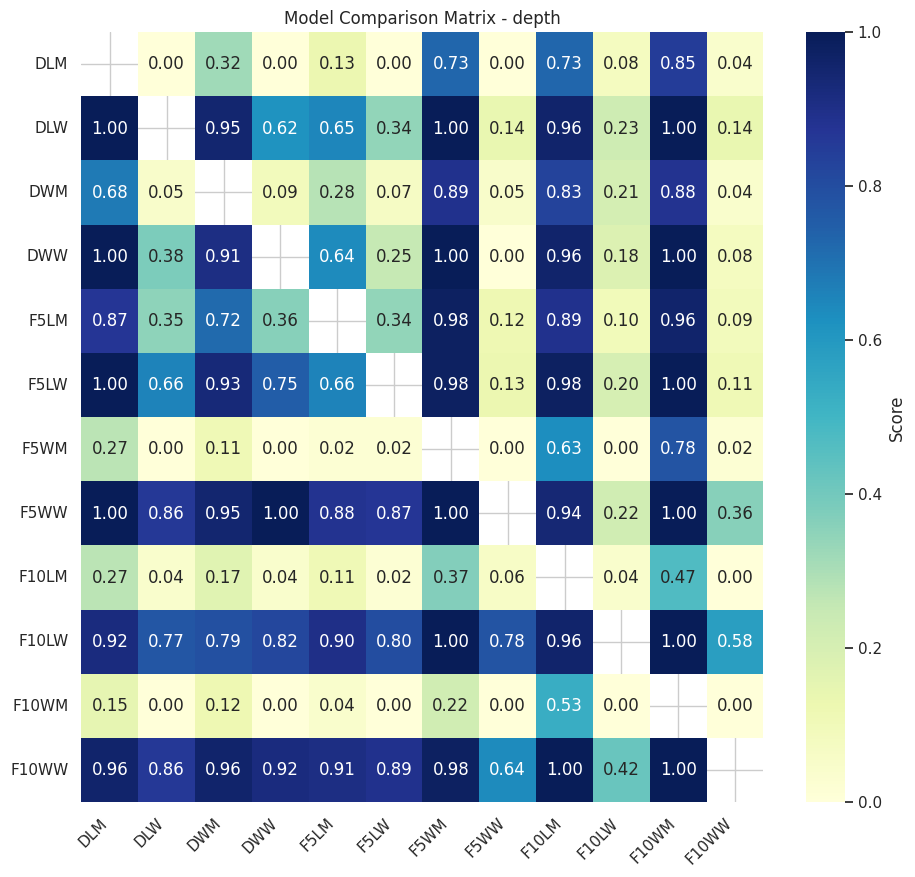

{-1, 0.03, 0.40, 0.03, 0.26, 0.18, 0.98, 0.10, 0.91, 0.85, 0.91, 0.55},
{0.97, -1, 0.95, 0.80, 0.56, 0.66, 1.00, 0.69, 1.00, 1.00, 1.00, 1.00},
{0.60, 0.05, -1, 0.22, 0.53, 0.32, 0.98, 0.40, 0.96, 0.76, 1.00, 0.83},
{0.97, 0.20, 0.78, -1, 0.62, 0.63, 1.00, 0.44, 1.00, 0.95, 1.00, 0.92},
{0.74, 0.44, 0.47, 0.38, -1, 0.46, 0.95, 0.38, 0.89, 0.45, 0.96, 0.55},
{0.82, 0.34, 0.68, 0.37, 0.54, -1, 0.98, 0.42, 1.00, 0.79, 1.00, 0.59},
{0.02, 0.00, 0.02, 0.00, 0.05, 0.02, -1, 0.02, 0.61, 0.14, 0.77, 0.02},
{0.90, 0.31, 0.60, 0.56, 0.62, 0.58, 0.98, -1, 0.91, 0.63, 1.00, 0.62},
{0.09, 0.00, 0.04, 0.00, 0.11, 0.00, 0.39, 0.09, -1, 0.17, 0.58, 0.21},
{0.15, 0.00, 0.24, 0.05, 0.55, 0.21, 0.86, 0.37, 0.83, -1, 0.96, 0.54},
{0.09, 0.00, 0.00, 0.00, 0.04, 0.00, 0.23, 0.00, 0.42, 0.04, -1, 0.04},
{0.45, 0.00, 0.17, 0.08, 0.45, 0.41, 0.98, 0.38, 0.79, 0.46, 0.96, -1},


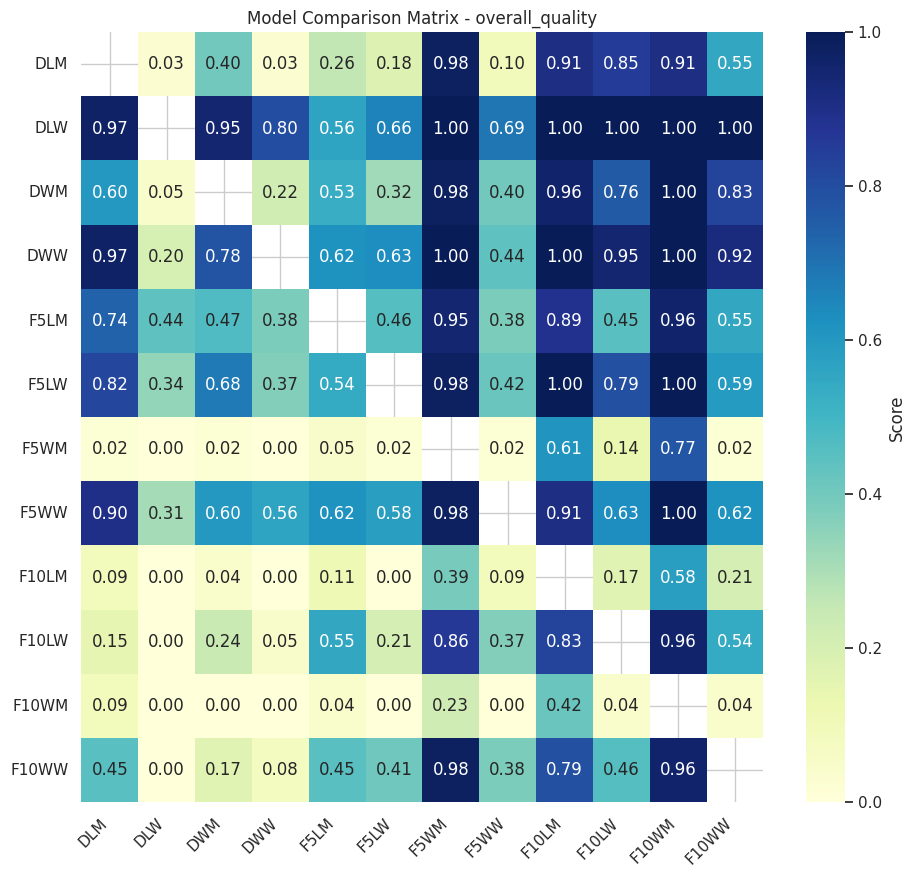

In [25]:
for criteria in data['criteria'].unique():
    plot_heatmap(data, criteria)

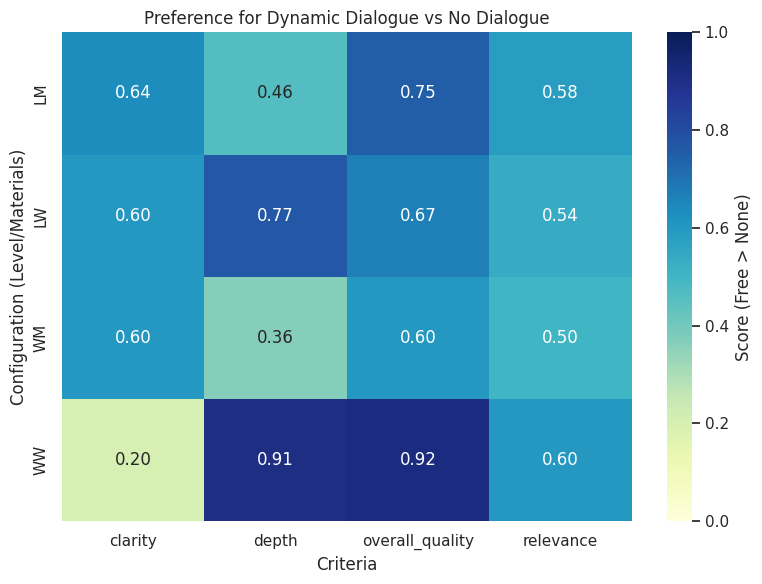

In [6]:
def process_none_vs_free():
    file_path = 'noneVSfree.csv'
    df = pd.read_csv(file_path)

    df['model_1'] = 'N'
    df['model_2'] = 'D'

    rename_map = {
        'attempt': 'question_id_1',
        'first': 'question_1',
        'second': 'question_2',
        'student_level': 'student_level_1',
        'materials': 'materials_1'
    }
    df = df.rename(columns=rename_map)

    df['question_id_2'] = df['question_id_1']
    df['student_level_2'] = df['student_level_1']
    df['materials_2'] = df['materials_1']

    def get_context_suffix(level, materials):
        l_str = 'L' if level else 'W'
        m_str = 'M' if materials else 'W'
        return f"{l_str}{m_str}"

    df['context'] = df.apply(lambda x: get_context_suffix(
        x['student_level_1'], x['materials_1']), axis=1)

    return df


def plot_none_vs_free_summary(data, filename_prefix='none_vs_free'):
    contexts = sorted(data['context'].unique())
    criteria_list = sorted(data['criteria'].unique())

    # Rows: Contexts, Cols: Criteria
    score_matrix = np.zeros((len(contexts), len(criteria_list)))

    for i, ctx in enumerate(contexts):
        for j, crit in enumerate(criteria_list):
            subset = data[(data['context'] == ctx) &
                          (data['criteria'] == crit)]

            if len(subset) == 0:
                score_matrix[i, j] = np.nan
                continue

            wins = subset[subset['difference'] > 0]
            score_sum = wins['difference'].abs().sum()
            weighted_total = subset['difference'].abs().sum()

            if weighted_total > 0:
                score = score_sum / weighted_total
                score_matrix[i, j] = score

    heatmap_df = pd.DataFrame(
        score_matrix, index=contexts, columns=criteria_list)

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_df, annot=True, fmt=".2f",
                cmap="YlGnBu", cbar_kws={'label': 'Score (Free > None)'}, vmin=0, vmax=1)
    plt.title("Preference for Dynamic Dialogue vs No Dialogue")
    plt.xlabel("Criteria")
    plt.ylabel("Configuration (Level/Materials)")
    plt.tight_layout()

    plt.savefig(f'Images/{filename_prefix}_summary.png')
    plt.show()


df_nvf = process_none_vs_free()
plot_none_vs_free_summary(df_nvf)